<a href="https://colab.research.google.com/github/judajuded2012/Employee_Attrition_Prediction/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
#Load the data 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/employee attrition dataset/train_data.csv')

In [ ]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [ ]:
df.shape

(19104, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
df.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df['Target']=np.where(df['LastWorkingDate'].isnull(),0,1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [ ]:
df['Education_Level'].unique()

array(['Master', 'College', 'Bachelor'], dtype=object)

In [ ]:
df.dtypes

MMM-YY                  object
Emp_ID                   int64
Age                      int64
Gender                  object
City                    object
Education_Level         object
Salary                   int64
Dateofjoining           object
LastWorkingDate         object
Joining Designation      int64
Designation              int64
Total Business Value     int64
Quarterly Rating         int64
Target                   int64
dtype: object

In [ ]:
df.columns


Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Target'],
      dtype='object')

In [ ]:
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [ ]:
df['Year_of_join'] = df['Dateofjoining'].apply(lambda t:t.year)
df['Month_of_join'] = df['Dateofjoining'].apply(lambda t:t.month)
df['Day_of_join'] = df['Dateofjoining'].apply(lambda t:t.day)
#df['Year_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.year)
#df['Month_of_leave'] = df['LastWorkingDate'].apply(lambda t:t.month)

In [ ]:
df.drop(columns='Dateofjoining',inplace=True)


In [ ]:
mypop = df.pop('Target')
df.insert(1,'Target',mypop)
mypop1 = df.pop('Year_of_join')
df.insert(8,'Year_of_join',mypop1)
mypop2 = df.pop('Month_of_join')
df.insert(9,'Month_of_join',mypop2)
mypop3 = df.pop('Day_of_join')
df.insert(10,'Day_of_join',mypop3)

In [ ]:
df = df.astype({'Year_of_join':int,'Month_of_join':int,'Day_of_join':int})

In [ ]:
df.drop(columns='LastWorkingDate',inplace=True)


In [ ]:
df['Target'].unique()


array([0, 1])

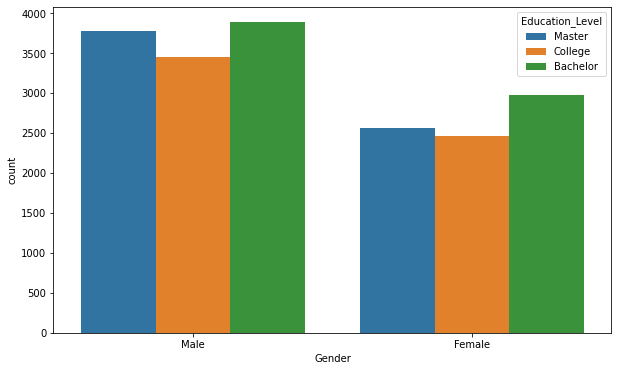

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Gender',hue='Education_Level')


In [ ]:
df.isnull().sum()

MMM-YY                  0
Target                  0
Emp_ID                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Salary                  0
Year_of_join            0
Month_of_join           0
Day_of_join             0
Joining Designation     0
Designation             0
Total Business Value    0
Quarterly Rating        0
dtype: int64

#Encoding

### One_Hot_Encoding

In [ ]:
one_hot_en = pd.get_dummies(df['Gender'])

In [ ]:
df = df.join(one_hot_en,how= 'left')

In [ ]:
df.drop(['MMM-YY','Gender','Male','City'],axis= 1, inplace= True)

In [ ]:
df.rename(columns={'Female':'Gender'}, inplace= True)

In [ ]:
df['Gender'].unique()

array([0, 1], dtype=uint8)

### Label Encoding

In [ ]:
df['Education_Level'].unique()

array(['Master', 'College', 'Bachelor'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()
df['Education_Level']= LE.fit_transform(df['Education_Level'])

In [ ]:
df['Education_Level'].unique()

array([2, 1, 0])

In [ ]:
df.head()

,Target,Emp_ID,Age,Education_Level,Salary,Year_of_join,Month_of_join,Day_of_join,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender
0,0,1,28,2,57387,2015,12,24,1,1,2381060,2,0
1,0,1,28,2,57387,2015,12,24,1,1,-665480,2,0
2,1,1,28,2,57387,2015,12,24,1,1,0,2,0
3,0,2,31,2,67016,2017,11,6,2,2,0,1,0
4,0,2,31,2,67016,2017,11,6,2,2,0,1,0


In [ ]:
joiners = df.groupby(by=['Year_of_join','Month_of_join']).count()['Emp_ID'].unstack()

#Ploting Correlation

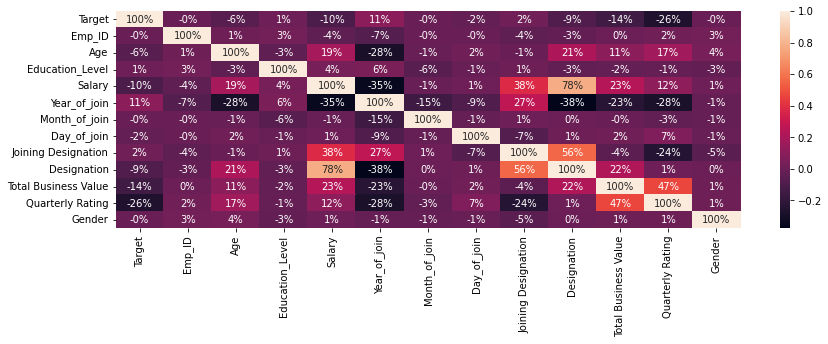

In [ ]:
plt.figure(figsize=(14,4))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

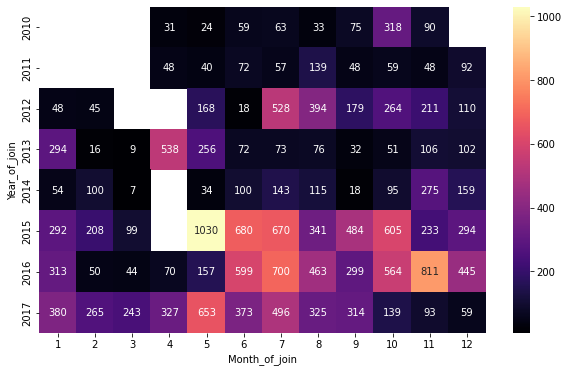

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(joiners,annot=True,fmt='.4g',cmap='magma')

In [ ]:
df['Target'].value_counts()


0    17488
1     1616
Name: Target, dtype: int64

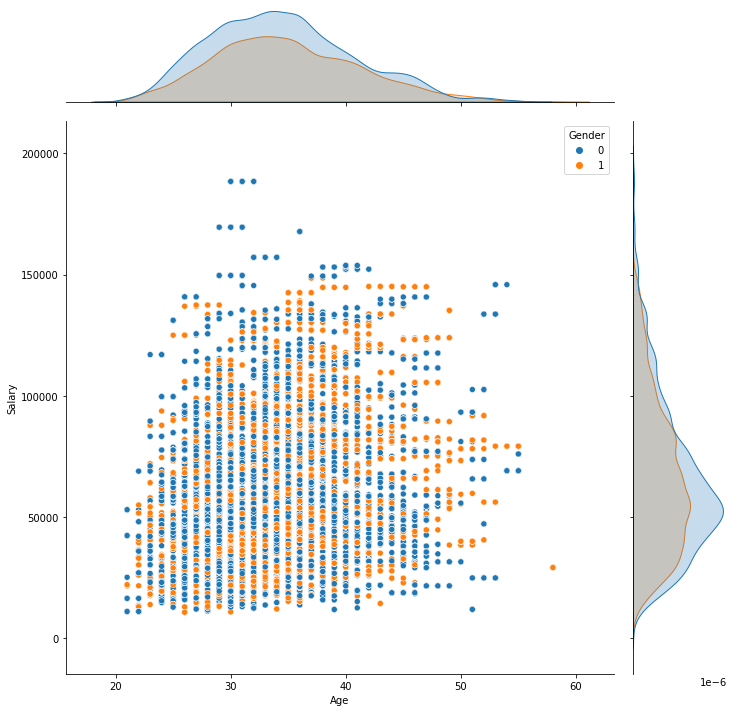

In [ ]:
sns.jointplot(data=df,x='Age',y='Salary',hue='Gender',height=10)

<Figure size 720x432 with 0 Axes>

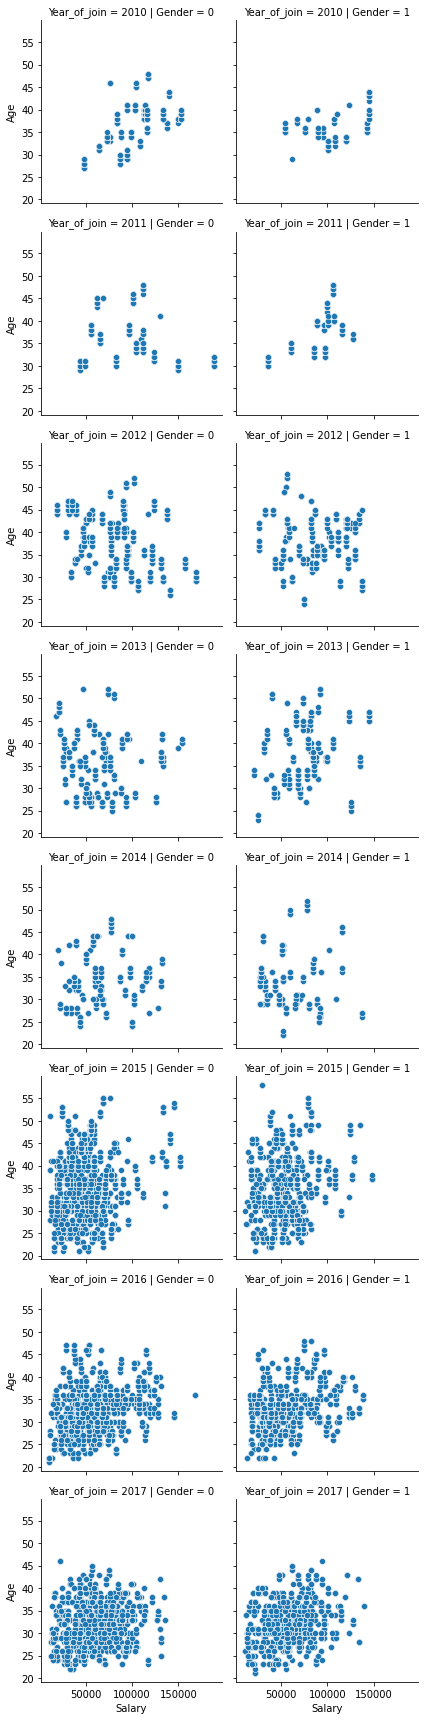

In [ ]:
plt.figure(figsize=(10,6))
fg = sns.FacetGrid(df, col="Gender",  row='Year_of_join')
fg.map(sns.scatterplot, "Salary", "Age")

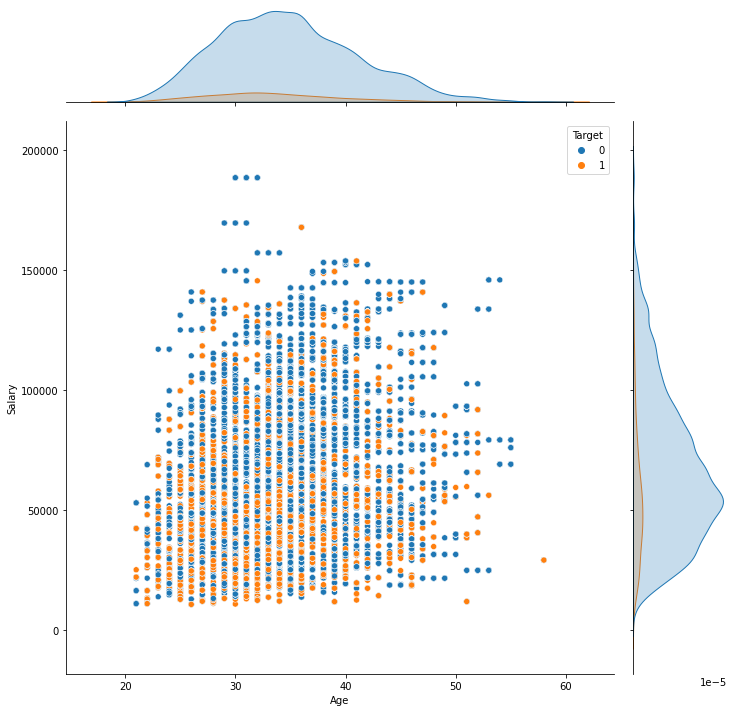

In [ ]:
sns.jointplot(data=df,x='Age',y='Salary',hue='Target',height=10)

In [ ]:
df.columns

Index(['Target', 'Emp_ID', 'Age', 'Education_Level', 'Salary', 'Year_of_join',
       'Month_of_join', 'Day_of_join', 'Joining Designation', 'Designation',
       'Total Business Value', 'Quarterly Rating', 'Gender'],
      dtype='object')

In [ ]:
train = df.copy()


In [ ]:
train['Gender'].unique()

array([0, 1], dtype=uint8)

In [ ]:
train.head()

,Target,Emp_ID,Age,Education_Level,Salary,Year_of_join,Month_of_join,Day_of_join,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender
0,0,1,28,2,57387,2015,12,24,1,1,2381060,2,0
1,0,1,28,2,57387,2015,12,24,1,1,-665480,2,0
2,1,1,28,2,57387,2015,12,24,1,1,0,2,0
3,0,2,31,2,67016,2017,11,6,2,2,0,1,0
4,0,2,31,2,67016,2017,11,6,2,2,0,1,0


In [ ]:
train[train < 0] = 0
print("New Array :")
train

New Array :


,Target,Emp_ID,Age,Education_Level,Salary,Year_of_join,Month_of_join,Day_of_join,Joining Designation,Designation,Total Business Value,Quarterly Rating,Gender
0,0,1,28,2,57387,2015,12,24,1,1,2381060,2,0
1,0,1,28,2,57387,2015,12,24,1,1,0,2,0
2,1,1,28,2,57387,2015,12,24,1,1,0,2,0
3,0,2,31,2,67016,2017,11,6,2,2,0,1,0
4,0,2,31,2,67016,2017,11,6,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,0,2788,30,2,70254,2017,6,8,2,2,740280,3,0
19100,0,2788,30,2,70254,2017,6,8,2,2,448370,3,0
19101,0,2788,30,2,70254,2017,6,8,2,2,0,2,0
19102,0,2788,30,2,70254,2017,6,8,2,2,200420,2,0


In [ ]:
train['Total Business Value'].unique()

array([2381060,       0,  350000, ...,  497690,  740280,  448370])

# Using SMOTE

In [ ]:
x = train.drop('Target',axis=1)
y = train['Target']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


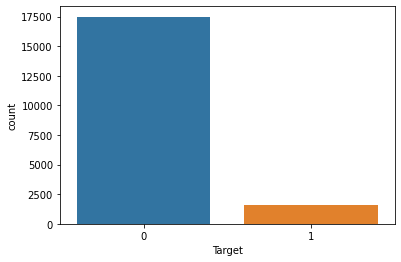

In [ ]:
sns.countplot(y)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


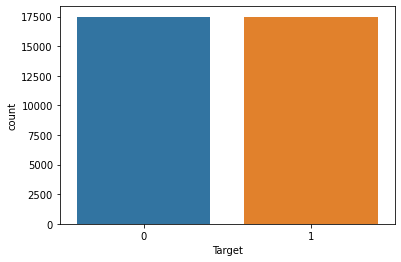

In [ ]:
sns.countplot(y)

#Split Data

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)


#Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg = LogisticRegression(solver='liblinear')


In [ ]:
logreg.fit(x_train,y_train)


LogisticRegression(solver='liblinear')

In [ ]:
LogisticRegression(solver='liblinear')


LogisticRegression(solver='liblinear')

In [ ]:
logreg_pred = logreg.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


-------------------- LOGISTIC REGRESSION --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.61      0.73      3511
           1       0.70      0.92      0.80      3485

    accuracy                           0.77      6996
   macro avg       0.79      0.77      0.76      6996
weighted avg       0.79      0.77      0.76      6996

-------------------------------------------------------------


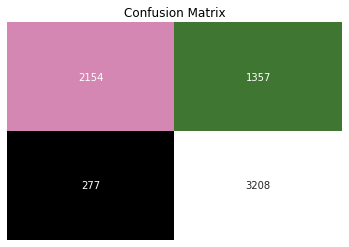

In [ ]:
viz_str = '-'* 20
print(viz_str,'LOGISTIC REGRESSION',viz_str)
print('Classification report:')
print(classification_report(y_test,logreg_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,logreg_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dtree = DecisionTreeClassifier()


In [ ]:
dtree.fit(x_test,y_test)


DecisionTreeClassifier()

In [ ]:
dtree_pred = dtree.predict(x_test)


-------------------- DECISION TREE --------------------
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3511
           1       1.00      0.98      0.99      3485

    accuracy                           0.99      6996
   macro avg       0.99      0.99      0.99      6996
weighted avg       0.99      0.99      0.99      6996

-------------------------------------------------------------


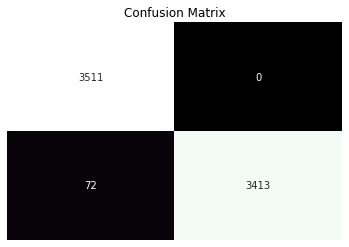

In [ ]:
viz_str = '-'* 20
print(viz_str,'DECISION TREE',viz_str)
print('Classification report:')
print(classification_report(y_test,dtree_pred))
print('-'*61)
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test,dtree_pred),annot=True,fmt='g',cmap='cubehelix',cbar=False, yticklabels=False, xticklabels=False)



# Using Cross - Validation

In [ ]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

model = DecisionTreeClassifier()
k_value= KFold(10)

res= cross_val_score(model,x,y,cv= k_value)

res = pd.DataFrame(res,columns=['Acc'])

res

,Acc
0,0.839351
1,0.896389
2,0.899529
3,0.875458
4,0.861780
5,0.867539
6,0.846597
7,0.874346
8,0.835602
9,0.837696
